## File : Exercise 7-1_Edris_Safari.ipynb
## Name:Edris Safari
## Date:1/20/2019
## Course: DSC530 - Data Exploration and Analysis
## Desc: Week7 exercise 7-1 assignment

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [10]:
from __future__ import print_function

import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2

In [11]:
def ScatterPlot(ages, weights, alpha=1.0):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)


def HexBin(ages, weights, bins=None):
    """Make a hexbin plot and save it.

    ages: sequence of float
    weights: sequence of float
    bins: 'log' or None for linear
    """
    thinkplot.HexBin(ages, weights, bins=bins)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     legend=False)


def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
    thinkplot.show()


In [13]:
thinkstats2.RandomSeed(17)
   

Get data frames for live, first bornes, and others 

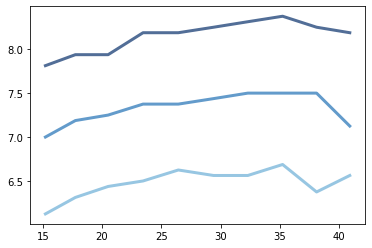

<Figure size 576x432 with 0 Axes>

In [14]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
BinnedPercentiles(live)


get pearson and spearman correlations

In [15]:
ages = live.agepreg
weights = live.totalwgt_lb
print('thinkstats2 Corr', thinkstats2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', 
        thinkstats2.SpearmanCorr(ages, weights))

thinkstats2 Corr 0.0688339703541091
thinkstats2 SpearmanCorr 0.09461004109658226


Draw scatter plot

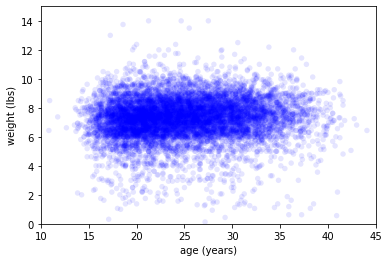

<Figure size 576x432 with 0 Axes>

In [16]:
ScatterPlot(ages, weights, alpha=0.1)
thinkplot.show()



